<h1><center>Laboratorio 5: El Pandas no Muerde (act IV) 🐼</center></h1>

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos</strong></center>

### Cuerpo Docente:

- Profesor: Matias Rojas y Mauricio Araneda
- Auxiliar: Ignacio Meza D.
- Ayudante: Rodrigo Ortiz

### Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados

- Nombre de alumno 1: Felipe Aguilar
- Nombre de alumno 2: Joaquín Pérez O.


### **Link de repositorio de GitHub:** ` https://github.com/JoaquinPerez17/Lab-MDS7202`


## Reglas:

- **Grupos de 2 personas**
- **Ausentes** deberán realizar la actividad solos. 
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Prohibidas las copias. 
- Pueden usar cualquer matrial del curso que estimen conveniente.

### Objetivos principales del laboratorio

- Aplicar los paradigmas y buenas prácticas de programación vistas hasta este momento.
- Comprender y aprovechar las ventajas que nos ofrece la liberia `numpy` con respecto a trabajar en Python 'puro'.
- Visualizar aplicaciones de filtros de imágenes sin el uso de librerías.
- Verificar que el uso indiscriminado de `for` puede afectar en la eficiencia en al procesar datos masivos.


El laboratorio deberá ser desarrollado sin el uso indiscriminado de iteradores nativos de python (aka "for", "while"). La idea es que aprendan a exprimir al máximo las funciones optimizadas que nos entrega `numpy`, las cuales vale mencionar, son bastante más eficientes que los iteradores nativos sobre arreglos (*o tensores*).

## Descripción del laboratorio.

### Importamos librerias utiles 😸

In [8]:
# Libreria Core del lab.
import numpy as np
!pip install --upgrade pandas
!pip install xlrd
!pip install openpyxl
import pandas as pd
import datetime
from scipy import stats

from IPython.display import display, Markdown, Latex

#Libreria para plotear
!pip install --upgrade plotly
!pip install missingno
import matplotlib.pyplot as plt
import missingno as msno
import plotly.express as px

In [ ]:
# Si usted está utilizando Colabolatory le puede ser útil este código para cargar los archivos.
try:
    from google.colab import drive
    drive.mount("/content/drive")
    path = 'Dirección donde tiene los archivos en el Drive'
except: 
    print('Ignorando conexión drive-colab')

Ignorando conexión drive-colab


<p align="center"><iframe width="560" height="315" src="https://www.youtube.com/embed/MW4d8_LLYp8?rel=0&amp;controls=0&amp;showinfo=0" frameborder="1" allowfullscreen></iframe></p>

# Segmentación de Clientes en Tienda de Retail 🛍️

<p align="center">
  <img width=300 src="https://s1.eestatic.com/2018/04/14/social/la_jungla_-_social_299733421_73842361_854x640.jpg">
</p>

## 1.1 Cargar Dataset

Mr. Lepin Mora quien es el gerente de una cotizada tienda de retail en Europa, les solicita si pueden analizar los datos de algunas de sus tiendas y si es posible extraer los diferenciar los tipos de clientes que posee el retail.

Para esto, el área de ventas les entrega el archivo `online_retail_II.xlsx` con el que se les pide que cargue y visualicen algunas de las filas que componen el Dataset.

Realice una primera visualización de los datos y señale los atributos que componen el dataset. Señale las columnas que conforman el dataset, el tipo de variable presente en cada columna y comente que representa cada una de estas.

**Respuesta:**
La base de datos contiene filas que corresponden a productos comprados con distintos atributos descritos por sus columnas, las cuales son:

Invoice del tipo Category que indica el número de la factura

StockCode del tipo Category que es el número del inventario

Description del tipo object que describe la compra

Quantity del tipo int64 que es la cantidad de copias compradas

InvoiceDate del tipo datetime64 indica la fecha de la compra

Price del tipo float64 precio del producto

Customer ID del tipo Category es el Id del comprador

Country del tipo object que es el país donde se realizo la compra 

Esto se obtine por medio de .info()

In [7]:
df_retail = pd.read_pickle("online_retail_II.pickle")
df_retail = df_retail.astype(
    {
        "Invoice": "category",
        "StockCode": "category",
        "Description": str,
        "Customer ID": "category",
    }
)
df_retail.head()


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


## 1.2 Analisís Explotatorio de los Datos [0.5 puntos] 

En base a la primera visualización del dataset, *Don Mora* le solicita que realicen un análisis exploratorio de los datos, para esto les deberán realizar un análisis univariado y multivariado. De la revisión, ustedes deben explicar potenciales anomalías visualizadas y señalar si existe la necesidad de realizar una limpieza de datos.

Explique a que nos referimos con análisis univariable, multivariable y de datos faltantes. ¿Qué beneficios nos otorga estudiar estos datos?. Sea conciso con su respuesta y no escriba mas de 5 líneas para su respuesta.

**Respuesta a la Pregunta:**

El análisis univariado estudia los patrones de las variables a través de estadísticas de resumen y análisis de la distribución de los datos. Aquí los datos se estudian de manera individual, sin considerar relaciones con otras variables. En cambio el análisis multivariado estudia como se comporta una variable con respecto a las otras de un conjunto de datos. Los datos faltantes son datos que no están dentro de la base de datos.
La idea de estudiar los datos es hacer un análisis exploratorio que nos permita identificar falencias en la información que permita adoptar una estrategía efectiva para el uso de los datos.

### 1.2.1 Análisis Univariado [2 Puntos]

A continuación, se le presentan dos funciones para analizar los datos que componen un dataframe. La primera de estas es la función ``profile_serie()`` la cual recibe una serie y le entrega un análisis detallado de los datos que conforman dicha serie. 

Ejecute la funcion ``profile_serie()`` sobre cada serie para realizar un análisis univariado de estas. A continuación, comente acerca de el comportamiento de cada variable según las estadísticas descriptivas y los gráficos generados.

In [10]:
from pandas.api.types import is_numeric_dtype
from pandas.core.dtypes.common import is_datetime_or_timedelta_dtype


def profile_serie(serie_in, n_samples=1000, random_state=42):
    serie = serie_in.copy()

    profile = pd.Series(dtype='object')
    profile["Type"] = serie.dtype
    profile = pd.concat([profile, serie.describe(datetime_is_numeric=True)])

    # profile = pd.Series([])

    if is_numeric_dtype(serie):
        profile["Negative"] = (serie < 0).sum()
        profile["Negative (%)"] = (
            str(round((serie < 0).sum() / len(serie) * 100, 2)) + " %"
        )
        profile["Zeros"] = (serie == 0).sum()
        profile["Zeros (%)"] = (
            str(round((serie == 0).sum() / len(serie) * 100, 2)) + " %"
        )
        profile["Kurt"] = serie.kurt()
        profile["Skew"] = serie.skew()

    profile[" "] = " "  # espacio

    profile["Missing cells"] = serie.isnull().sum()
    profile["Missing cells (%)"] = (
        str(round(serie.isnull().sum() / len(serie) * 100, 2)) + " %"
    )
    profile["Duplicate rows"] = serie.duplicated(False).sum()
    profile["Duplicate rows (%)"] = (
        str(round(serie.duplicated(False).sum() / len(serie) * 100, 2)) + " %"
    )
    profile["Total size in memory"] = str(serie.memory_usage(index=True)) + " bytes"

    # profile = pd.concat([profile, description])

    profile = profile.rename(
        index={
            "count": "Number of observations",
            "mean": "Mean",
            "std": "Std",
            "min": "Min",
            "max": "Max",
            "unique": "Unique",
            "top": "Top",
            "freq": "Freq",
        }
    )
    no_outliers_fig = None

    if is_numeric_dtype(serie):

        sampled_serie = serie.sample(n_samples, random_state=random_state)
        fig = px.histogram(
            sampled_serie, marginal="box", title=f"{serie.name} - With Outliers"
        )

        no_outliers = sampled_serie.loc[(np.abs(stats.zscore(sampled_serie)) < 3)]
        # zscore = https://es.wikipedia.org/wiki/Unidad_tipificada
        
        no_outliers_fig = px.histogram(
            no_outliers, marginal="box", title=f"{serie.name} - Without Outliers"
        )

    elif is_datetime_or_timedelta_dtype(serie):
        sampled_serie = serie.sample(n_samples, random_state=random_state)
        fig = px.histogram(sampled_serie, marginal="box", title=f"{serie.name}")
    
    else:
        count = (
            serie.value_counts()[0:100]
            .reset_index()
            .rename(columns={"index": serie.name, serie.name: "Count"})
        )
        fig = px.bar(
            x=count[serie.name].astype(str),
            y=count["Count"],
            title=f"100 Most common categories of {serie.name}",
        )
    display(Markdown(f'## {serie.name} Profile'))
    display(profile)
    fig.show()

    if no_outliers_fig:
        no_outliers_fig.show()

    # return fig, profile

## Invoice Profile

Type                           category
Number of observations           525461
Unique                            28816
Top                              537434
Freq                                675
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   517456
Duplicate rows (%)              98.48 %
Total size in memory      2338386 bytes
dtype: object

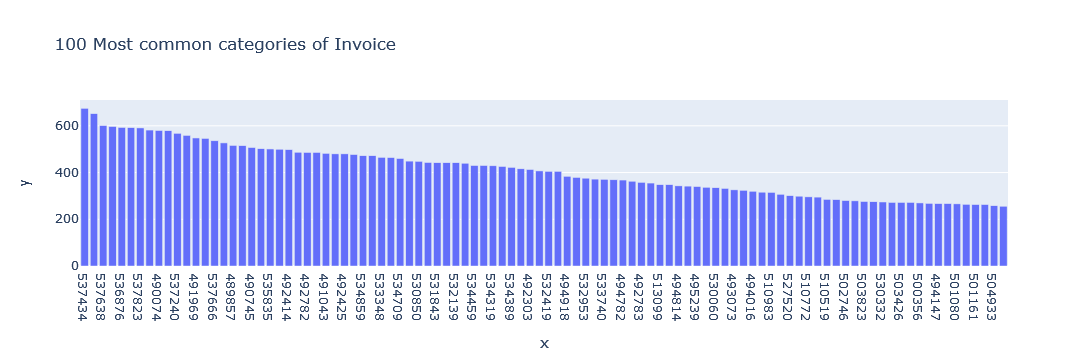

In [12]:
profile_serie(df_retail['Invoice']) 

#### Serie 'Invoice'

La serie 'Invoice' tiene 525461 observaciones con 28816 valores únicos siendo el '537434' el valor más comun con una frecuencia de 675. No existen celdas vacias para esta serie. El porcentaje de filas dup´plicadas es de un 98.48% el cual es alto debido a la baja cantidad de valores unicos registrados.

Respecto al histograma se aprecia que la frecuencia para todos los registros existen frecuencias mayores a 200 (cantidad de productos por factura) llegando a los 675 para el dato '537434', se aprecia un decrecimiento lineal de los datos con una pendiente negativa para los datos presentados en el gráfico.

## StockCode Profile

Type                           category
Number of observations           525461
Unique                             4632
Top                              85123A
Freq                               3516
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   525026
Duplicate rows (%)              99.92 %
Total size in memory      1220242 bytes
dtype: object

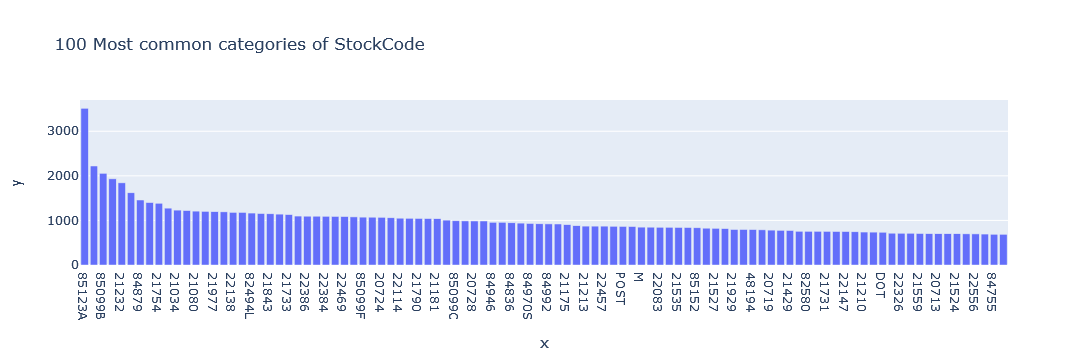

In [18]:
profile_serie(df_retail['StockCode']) 

#### Serie 'StockCode'

La serie 'StockCode' tiene 525461 observaciones con 4632 valores únicos siendo el '85123A' el valor más comun dentro con una frecuencia de 3516. No existen celdas vacias para esta serie. El porcentaje de filas duplicadas es de un 99.92% el cual es alto debido a la baja cantidad de valores unicos registrados.

Respecto al histograma se aprecia que la frecuencia para todos los registros existen frecuencias mayores a 650 (numero de veces en el inventario) llegando a los 3516 para el dato '85123A', se aprecia un decrecimiento rapido para las categorias con más frecuencia, teniendo una disminución de más de 1000 para el segundo dato más frecuente. A partir de la decima categoria se presenta un decaimiento lineal de los datos con una pendiente más suave a la inicial.

## Description Profile

Type                                                  object
Number of observations                                525461
Unique                                                  4682
Top                       WHITE HANGING HEART T-LIGHT HOLDER
Freq                                                    3549
                                                            
Missing cells                                              0
Missing cells (%)                                      0.0 %
Duplicate rows                                        525198
Duplicate rows (%)                                   99.95 %
Total size in memory                           4203816 bytes
dtype: object

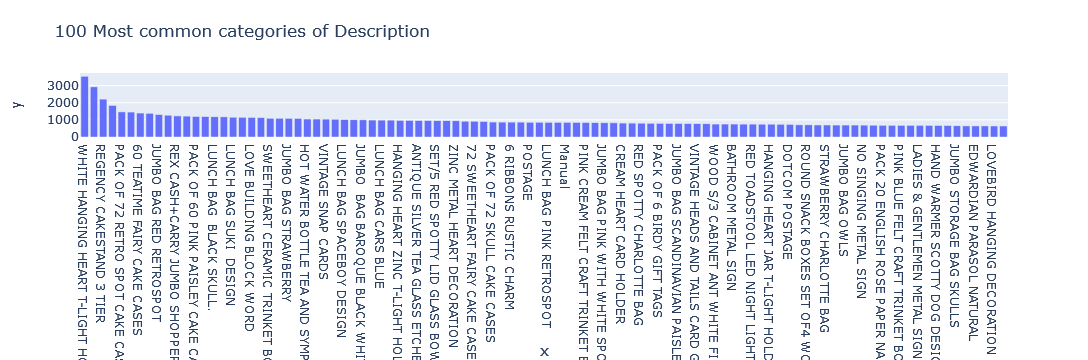

In [19]:
profile_serie(df_retail['Description']) 

#### Serie 'Description'

La serie 'Description' tiene 525461 observaciones con 4682 valores únicos siendo el 'WHITE HANGING HEART T-LIGHT HOLDER' el más comun dentro con una frecuencia de 3549, al compararla con la cantidad de valores unicos de la serie 'StockCode' existe una diferencia de 50 valores lo que apunta a errores en la base de datos dado que se espera que cada producto inventiarado tuviese una descripción unica, por lo que se podría deber a errores en su registro como es el mal ingreso de algún caracter que hace que difieran las descripciones. No existen celdas vacias para esta serie. El porcentaje de filas duplicadas es de un 99.95% el cual es alto debido a la baja cantidad de valores unicos registrados.

Respecto al histograma se aprecia que las descripciones con frecuencias más altas tienen un comportamiento similar al de la serie 'StockCode' no presentando una disminución menor a la vista anteriormente, partir de la septima categoria se presenta un decaimiento lineal de los datos con una pendiente más suave a la inicial. 

## Quantity Profile

Type                              int64
Number of observations         525461.0
Mean                          10.337667
Std                           107.42411
Min                             -9600.0
25%                                 1.0
50%                                 3.0
75%                                10.0
Max                             19152.0
Negative                          12326
Negative (%)                     2.35 %
Zeros                                 0
Zeros (%)                         0.0 %
Kurt                        6277.666908
Skew                          36.044617
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   525122
Duplicate rows (%)              99.94 %
Total size in memory      4203816 bytes
dtype: object

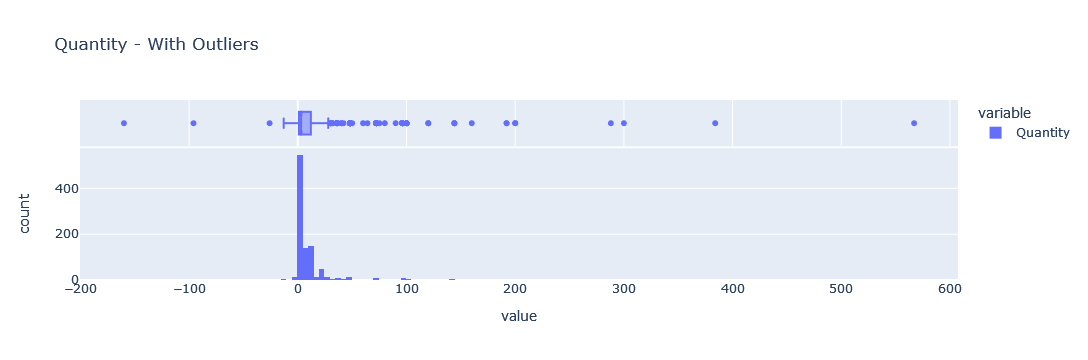

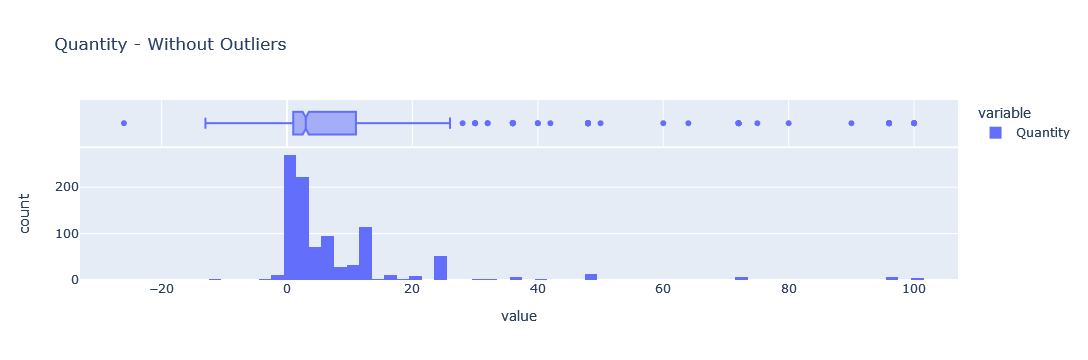

In [20]:
profile_serie(df_retail['Quantity']) 

#### Serie 'Quantity'

La serie 'Quantity' esta compuesta por valores enteros, tiene 525461 presentando una media de 10.33 y una desviación estandar de 107.42, al analizar estos datos se da cuenta de la existencia de valores negativos lo que podría estar erroneo dado que la cantidad de productos no puede ser negativa, se tiene como valor mínimo una cantidad de -9600 que se encuentra dentro del 2.35% de datos negativos que presenta la serie con un total de 12326. El 25% de los datos esta bajo 1, el 50% bajo 3 como cantidad y el 75% alcanza los 10, lo que indica una baja cantidad de cada producto en la base de datos. La cantidad máxima es de 19152 la que es ampliamente superior a los datos revisados y que según el histograma y el boxplot es un outlier. No existen celdas vacias  y se tiene un total de 525122 de duplicados que equivale al 99.94% de los datos.

Posee una Curtosis positiva, es decir, concentración alta de los datos con respecto a la media. La simetría es positiva lo que se traduce en que el los datos están inclinados hacia la izquierda del gráfico.

Con respecto a los gráficos se observa que el que contiene outliers la distribución es menos visible dada la magnitud de estos, en el grafico sin outliers se obtiene un rango entre los -26 a los 101 siendo los negativos valores a revisar y tener en cuanta al momento de analizar la información.

## InvoiceDate Profile

Type                                     datetime64[ns]
Number of observations                           525461
Mean                      2010-06-28 11:37:36.845017856
Min                                 2009-12-01 07:45:00
25%                                 2010-03-21 12:20:00
50%                                 2010-07-06 09:51:00
75%                                 2010-10-15 12:45:00
Max                                 2010-12-09 20:01:00
                                                       
Missing cells                                         0
Missing cells (%)                                 0.0 %
Duplicate rows                                   520400
Duplicate rows (%)                              99.04 %
Total size in memory                      4203816 bytes
dtype: object

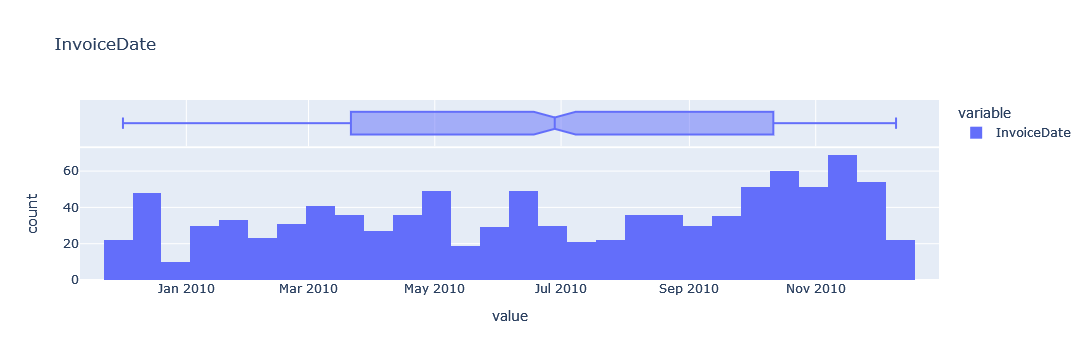

In [27]:
profile_serie(df_retail['InvoiceDate']) 

#### Serie 'InvoiceDate'

La serie 'InvoiceDate' tiene 525461 y es del tipo datetime (fechas). la serie esta comprendida entre el 2009-12-01 07:45:00 al 2010-12-09 20:01:00, el 50% de los datos tienen una fecha hasta el 2010-07-06 09:51:00. No se registran datos nulos y la cantidad de duplicados es de 520400 equivalente al 99.04% de los datos. 

Al análizar el gráfico se observa que el boxplot esta desplazado hacia la derecha lo que indica que los registros fueron mayores para las fechas más tardías de la base de datos.

## Price Profile

Type                            float64
Number of observations         525461.0
Mean                           4.688834
Std                          146.126914
Min                           -53594.36
25%                                1.25
50%                                 2.1
75%                                4.21
Max                            25111.09
Negative                              3
Negative (%)                      0.0 %
Zeros                              3687
Zeros (%)                         0.7 %
Kurt                       64868.344873
Skew                        -140.768446
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   524485
Duplicate rows (%)              99.81 %
Total size in memory      4203816 bytes
dtype: object

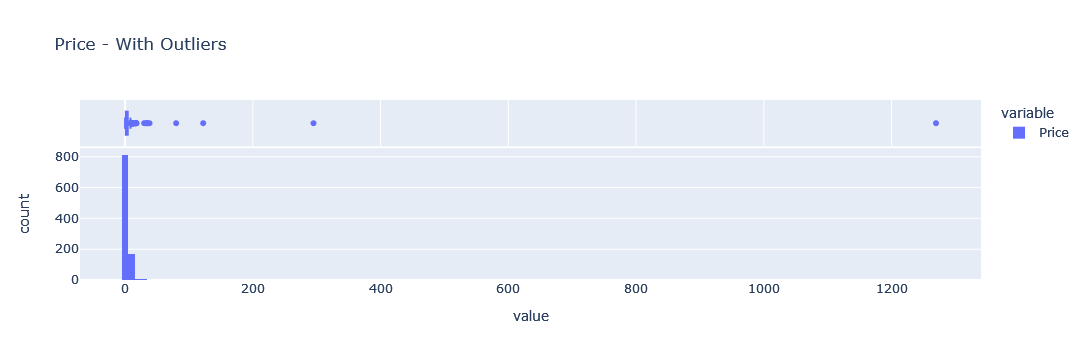

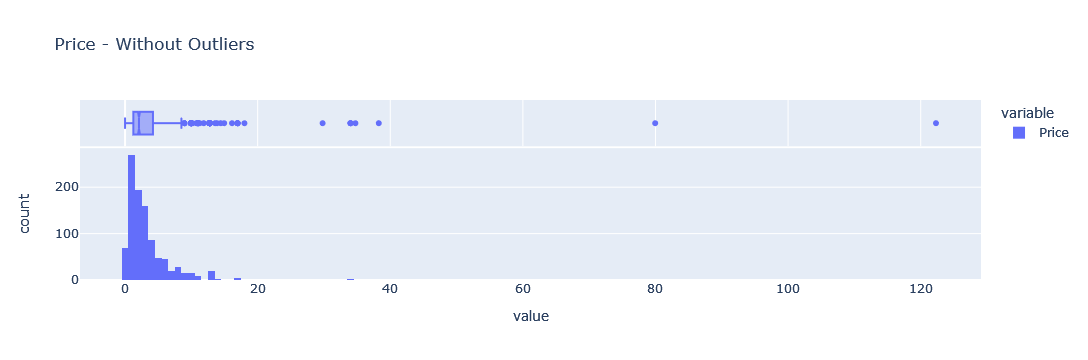

In [28]:
profile_serie(df_retail['Price']) 

#### Serie 'Price'

La serie 'Price' esta compuesta por valores flotantes, tiene 525461 presentando una media de 4.69 y una desviación estandar de 146.13, al analizar estos datos se da cuenta de la existencia de valores negativos lo que podría estar erroneo dado que el valor de los productos no puede ser negativa, se tiene como valor mínimo una cantidad de -53594.36 que se encuentra dentro de los 3 datos negativos de la serie. El 25% de los datos esta bajo 1.25, el 50% bajo 2.1 como cantidad y el 75% alcanza los 4.21, estos valores indican que los productos en general no son valores altamente elevados. La cantidad máxima es de 25111.09 la que es ampliamente superior a los datos revisados. No existen celdas vacias  y se tiene un total de 524485 de duplicados que equivale al 99.81% de los datos.

Posee una Curtosis positiva, es decir, concentración alta de los datos con respecto a la media. La simetría es negativa lo que se traduce en que el los datos están inclinados hacia la derecha del gráfico.

Con respecto a los gráficos se observa que el que contiene outliers la distribución es menos visible dada la magnitud de estos, en el grafico sin outliers se obtiene un rango entre los 0 a los 122.3.

## Customer ID Profile

Type                           category
Number of observations         417534.0
Unique                           4383.0
Top                             14911.0
Freq                             5710.0
                                       
Missing cells                    107927
Missing cells (%)               20.54 %
Duplicate rows                   525327
Duplicate rows (%)              99.97 %
Total size in memory      1218250 bytes
dtype: object

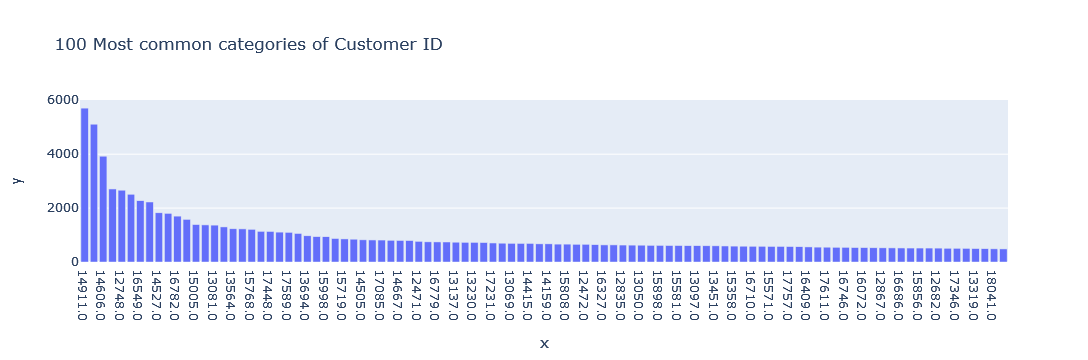

In [29]:
profile_serie(df_retail['Customer ID']) 

#### Serie 'Customer ID'

La serie 'Customer ID' tiene 417534 observaciones con 4383 valores únicos siendo el '14911' (cliente con más registros) el valor más comun con una frecuencia de 5710. Existen 107927 celdas vacias equivalentes al 20.54% de los datos de la serie. El porcentaje de filas duplicadas es de un 99.97% el cual es alto debido a la baja cantidad de valores unicos registrados.

Respecto al histograma se aprecia que la frecuencia para todos los registros existen frecuencias mayores a 400 (numero de veces que se ingresado cada cliente) llegando a los 5710 para el dato '14911', se aprecia un decrecimiento rapido en las primeras 3 categorias con más frecuencia, teniendo una disminución a los 2710 para la cuarta categoria más frecuente, a partir de esta se presenta un decaimiento lineal de los datos con una pendiente más suave a la inicial.

## Country Profile

Type                              object
Number of observations            525461
Unique                                40
Top                       United Kingdom
Freq                              485852
                                        
Missing cells                          0
Missing cells (%)                  0.0 %
Duplicate rows                    525461
Duplicate rows (%)               100.0 %
Total size in memory       4203816 bytes
dtype: object

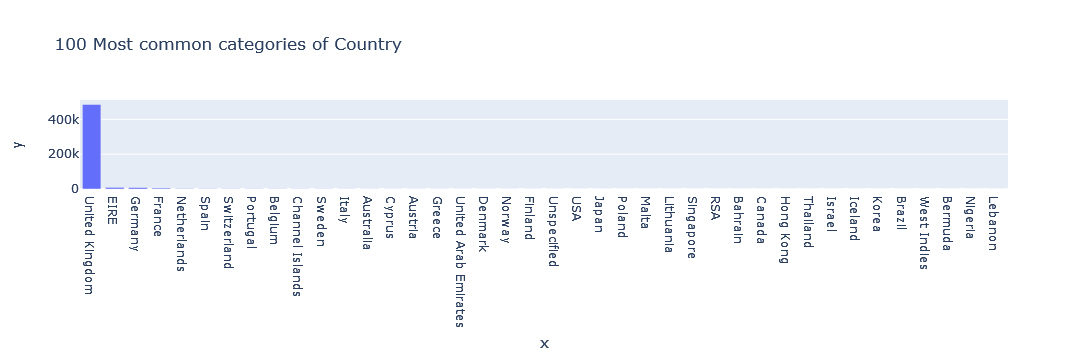

In [31]:
profile_serie(df_retail['Country']) 

#### Serie 'Country'

La serie 'Country' tiene 525461 observaciones con 40 valores únicos siendo el 'United Kingdom' (país con más registros) el valor más comun con una frecuencia de 485852. No existen  celdas vacias en la serie. El porcentaje de filas duplicadas es de un 100% pero es un aproximado dado que existen registros para una serie de paises incluso latinoamericanos pero con una frecuencia muy baja por lo que se podría inferir que la base de datos es de una tienda de retail de United Kingdom.

Respecto al histograma se aprecia casi la totalidad de los datos esta dentro de United Kingdom teniendo frecuencias bajas con respecto a la primera.

### 1.2.2 Análisis Multivariado y Datos Faltantes [1 ptos]

En segundo lugar encontrará la función ``profile_df()`` que recibe un dataframe como entrada y realiza un análisis bivariado de todas las variables numéricas que conforman el dataframe, un analisis de la correlación de Pearson entre las variables numericas del dataframe y la matriz de datos faltantes.

In [32]:
def profile_df(dataframe_in):
    df = dataframe_in.copy()

    list_type = []
    for col in list(df.columns):
        if is_numeric_dtype(df[col]) or \
        pd.core.dtypes.common.is_datetime_or_timedelta_dtype(df[col]):
            list_type.append(col)

    
    display(Markdown('## Bivariant Analysis:'))
    for i in range(len(list_type)):
        for j in range(i+1, len(list_type)):
            plt.scatter(df[list_type[i]], df[list_type[j]])
            plt.xlabel(list_type[i]) 
            plt.ylabel(list_type[j]) 
            plt.title(f"{list_type[i]} v/s {list_type[j]}")
            plt.show()

    display(Markdown('## Correlation:'))
    fig_corr = px.imshow(df.corr())
    fig_corr.show()

    display(Markdown('## Missing Matrix:'))
    fig, ax = plt.subplots(figsize=[15, 10])
    msno.matrix(df, ax=ax, sparkline=False)

## Bivariant Analysis:

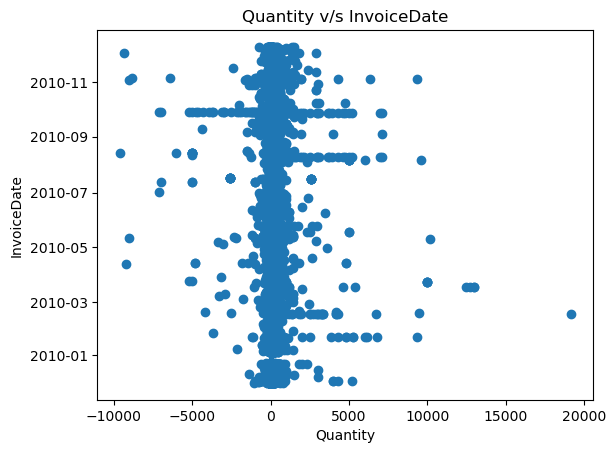

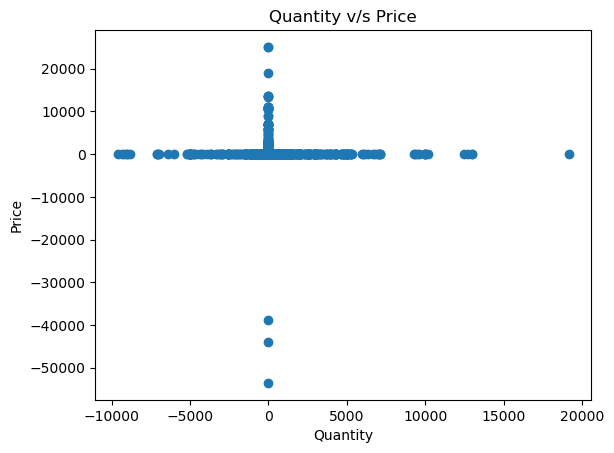

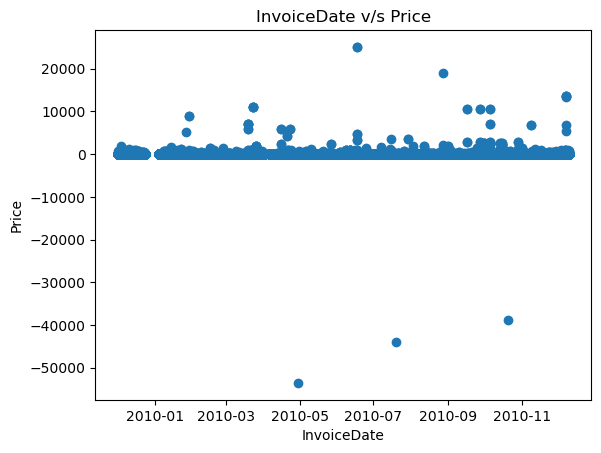

## Correlation:

C:\Users\Mario\AppData\Local\Temp\ipykernel_12336\1966549970.py:21: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



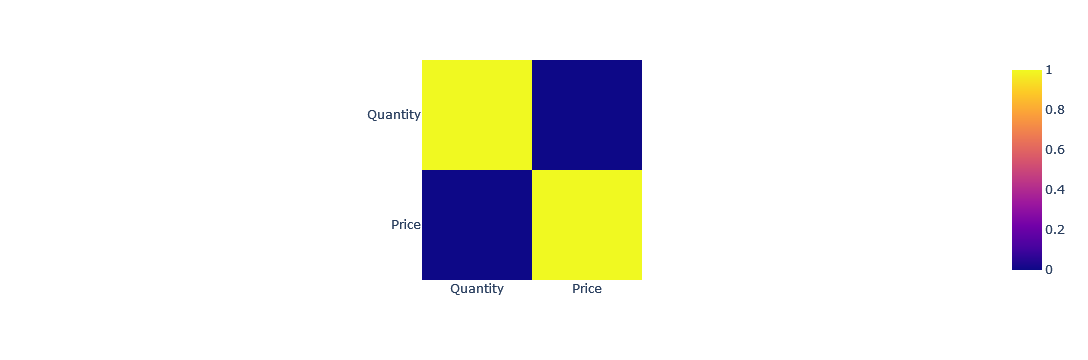

## Missing Matrix:

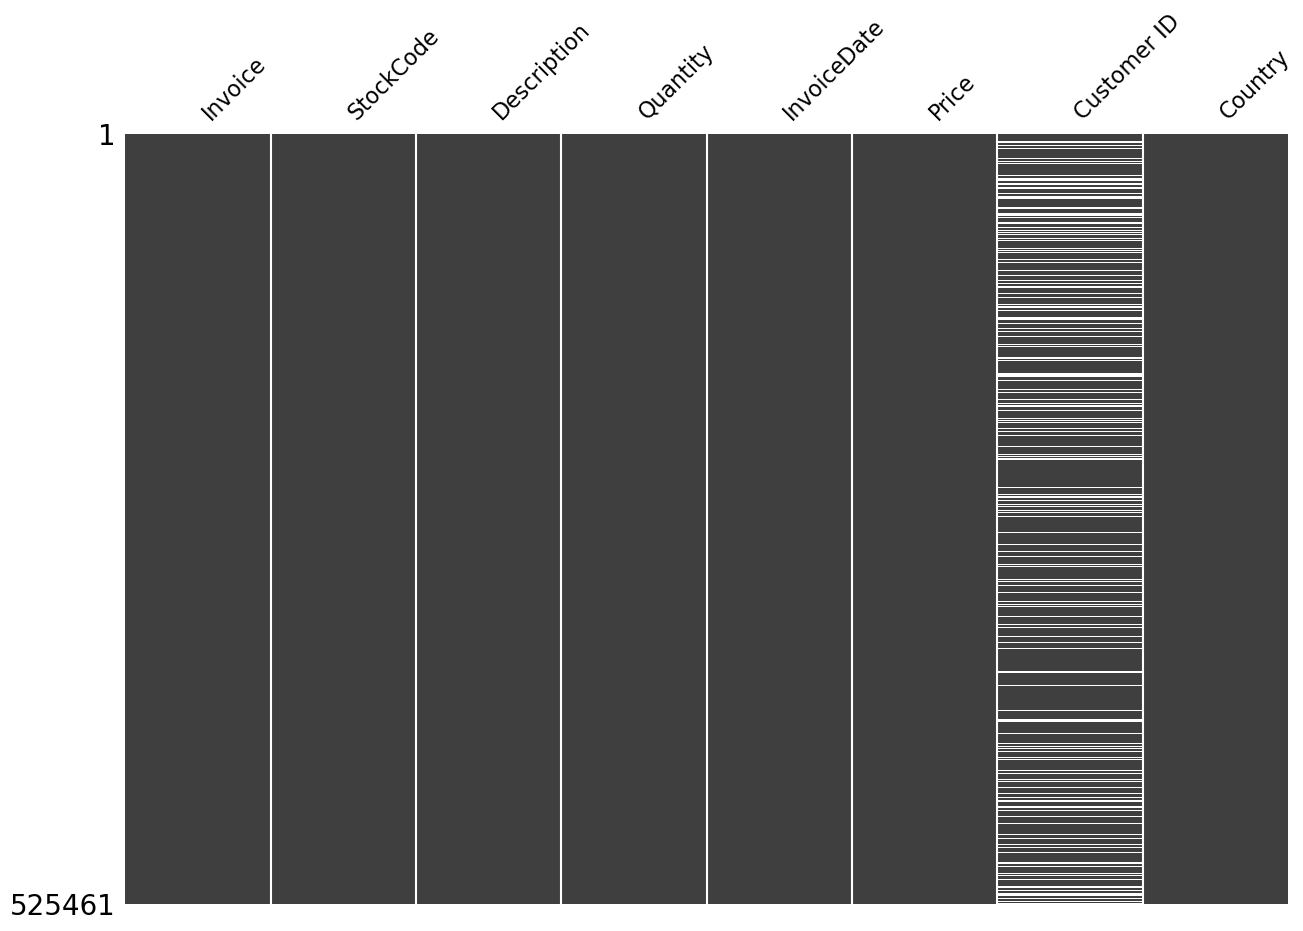

In [34]:
profile_df(df_retail)

**Respuesta:** 

**Bivariado: Quantity vs InvoideDate**: Los datos se concentran en su mayoria sobre el cero lo que indica que la mayor cantidad de datos son de una baja cantidad pero sin un patron de fechas por lo que no se concluye que tengan una relación entre estas variables.

**Bivariado: Quantity vs Price**: ala analizar el cuadrante positivo se puede apreciar que no existe una correlación entre estas variables, es posible que existiese pero la visualización no es la mejor dado que no muestra los valores cercanos a 0 para la cantidad y el precio .

**Bivariado: InvoideDate vs Price**: no se evidencia una correlación entre estas variables, la fecha puede influir en el valor de los productos pero en este caso se esta analizando el conjunto de productos y no por cada uno que podría entregar una mejor vista para su analisis.

**Correlaciones**: No se observa correlación entre las variables cuantitativas. Lo cual es esperable dado que una baja cantidad de productos no necesariamente esta ligada a precios bajos.

**Datos faltantes**: La única variable con datos faltantes es "Customer ID" situación que se pudo apreciar en el analisis univariado.


### 1.2.3 Limpieza de Datos [1 pto]

Como pudo ver en las secciones anteriores, los datos presentan valores erroneos, es por esto que se le solicita que realice una función que permita limpiar el dataset. Realice esta función en base observaciones propias y considere como imposible tener cantidades negativas en las ventas.

Una vez realizada la función, realice nuevamente el análisis exploratorio y comente las principales diferencias.

**Respuesta:**

In [35]:
def clean_data(df):
    clean = df.copy()
    # extraer precios y cantidades negativos
    clean = cleaned[cleaned['Price'] >= 0]
    clean = cleaned[cleaned['Quantity'] > 0]
    
    return clean

### 1.2.4 Obtención de TOPs [0.75 ptos]

Sin considerar los comentarios realizados en la sección 1.2 , *Don Mora* les pide obtener el **Top de 30 productos que generan más ganancias** para la tienda de retail. Deben considerar todo el registro temporal presente en el dataset y entregar la información en un gráfico de barras de los ingresos/cantidades v/s el nombre de los productos (Utilice `plotly`). ¿Los artículos más vendidos son los mismos que generan más ganancias?, Comente los resultados obtenidos.

**Resultados:**

In [ ]:
> Código Aquí

### 1.2.5 Visualización del registro temporal [0,75 ptos]

El dueño del retail en su afán por saber más sobre los datos de su firma les solicita que grafiquen las ventas respecto al tiempo. Con esto les aclara que durante el día tienen muchas variaciones en sus ventas, por lo que les recomienda que consideren el registro temporal como `año-mes-día`. ¿Es posible observar datos extraños?, Comente lo que observa del gráfico.

In [ ]:
def plot_ventas(dataframe):
    pass

# Conclusión
Eso ha sido todo para el lab de hoy, recuerden que el laboratorio tiene un plazo de entrega de una semana y que **los días de atraso no se pueden utilizar para entregas de lab** solo para tareas. Cualquier duda del laboratorio, no duden en contactarnos por mail o U-cursos.

![Gracias Totales!](https://i.pinimg.com/originals/65/ae/27/65ae270df87c3c4adcea997e48f60852.gif "bruno")


<br>
<center>
<img src="https://i.kym-cdn.com/photos/images/original/001/194/195/b18.png" width=100 height=50 />
</center>
<br>